DecisionTreeRegressor (default parameters, random_state=42)
R²  = 0.6359
MAE = 1.56 mpg
RMSE= 3.08 mpg

Top 10 Feature Importances:
cylinders                  0.5602
is_high_performance        0.2280
displacement               0.0855
make_encoded               0.0462
is_hybrid                  0.0198
drivetrain_type_encoded    0.0162
size_category_encoded      0.0157
vehicle_age                0.0077
year                       0.0076
class_encoded              0.0052
dtype: float64



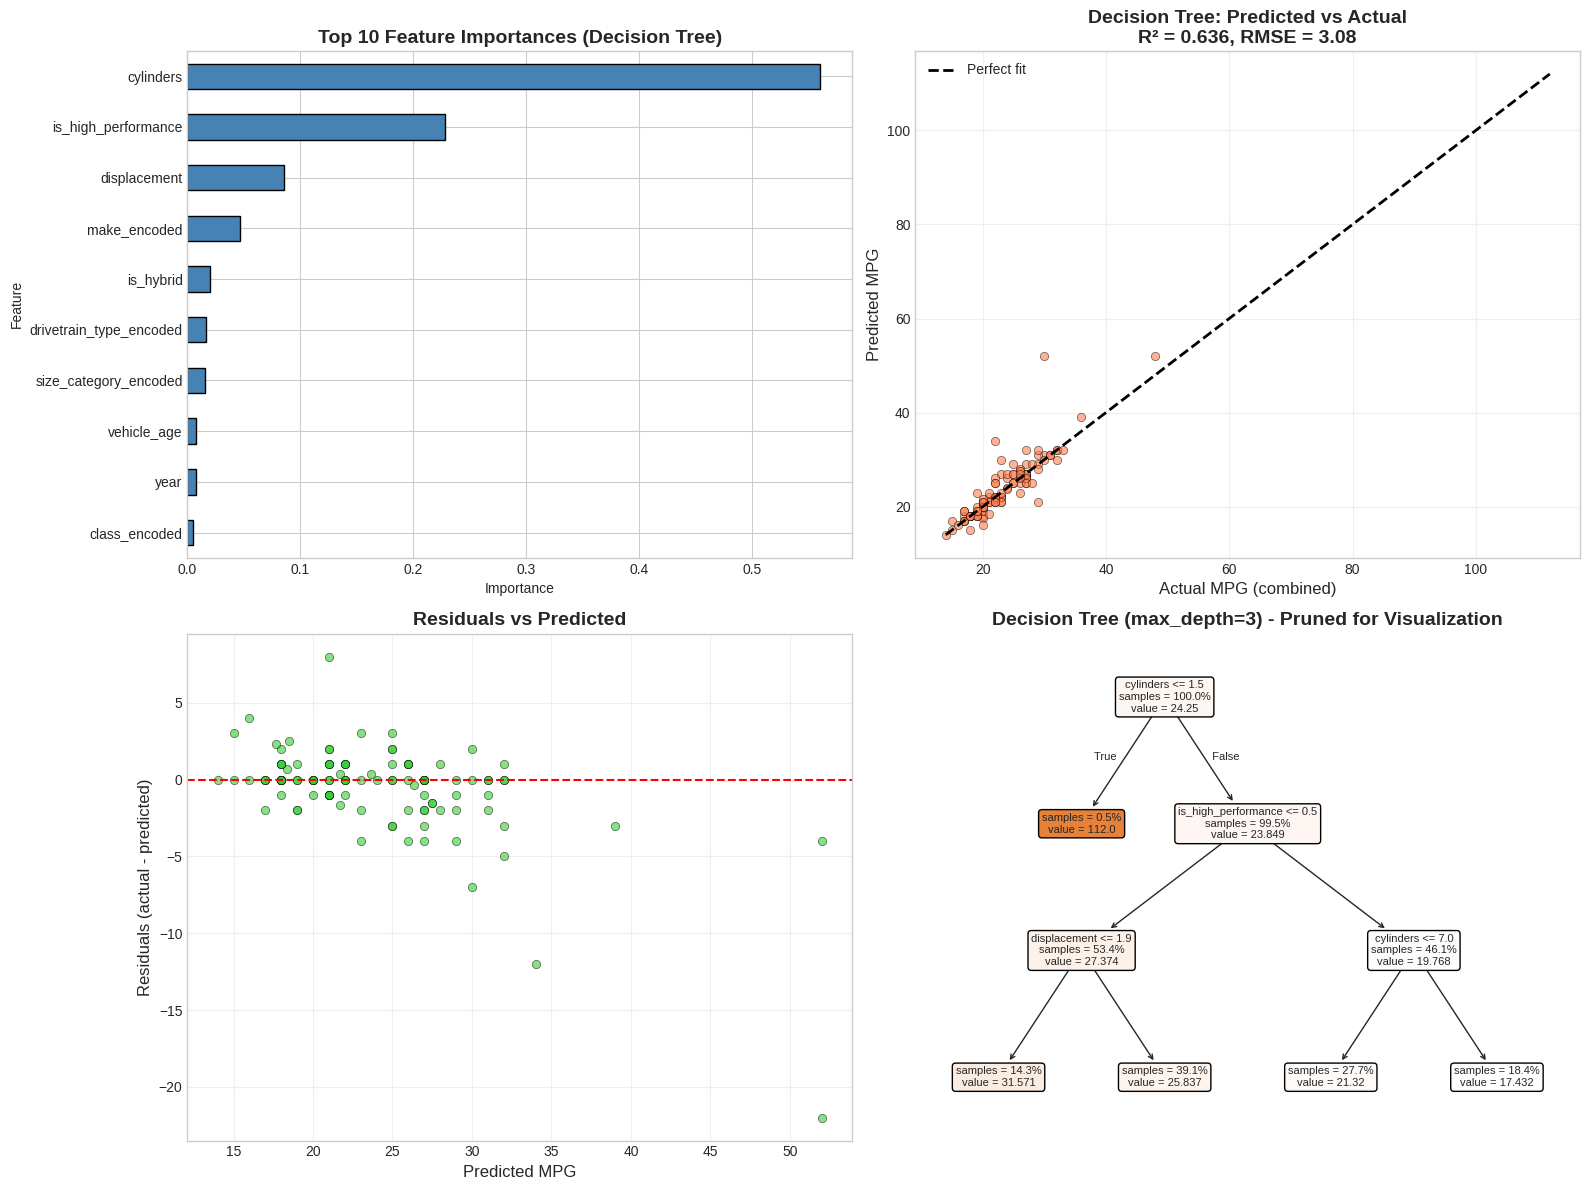


Note: The large default tree (unconstrained) heavily overfits.
The small tree (max_depth=3) above is only for visualisation.
Train Score: 0.9952
Test Score: 0.6359


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------------------- 1. LOAD THE FULL DATASET ----------------------
csv_data = """city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year,mpg_diff,engine_efficiency,engine_power_density,size_category,drivetrain_type,vehicle_age,fuel_efficiency_category,is_high_performance,is_luxury,is_electric,is_diesel,is_hybrid,is_automatic,is_manual,make_encoded,class_encoded,drive_encoded,fuel_type_encoded,transmission_encoded,size_category_encoded,drivetrain_type_encoded,city_mpg_scaled,combination_mpg_scaled,cylinders_scaled,displacement_scaled,highway_mpg_scaled,year_scaled,vehicle_age_scaled,engine_efficiency_scaled
25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014,11,11.55378486055777,0.6234413965087282,medium,front_wheel,10,medium,0,0,0,0,0,0,1,19,2,2,2,1,1,2,0.43489038957152415,0.6599564613138468,-0.7266130964452053,-0.33487569267244005,1.0827562664530401,-1.5811388300841895,1.5811388300841895,-0.05819937158833628
26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014,11,11.952191235059763,0.6234413965087282,medium,front_wheel,10,medium,0,0,0,0,0,1,0,19,2,2,2,0,1,2,0.5577407821058531,0.7937971890876726,-0.7266130964452053,-0.33487569267244005,1.229254654288015,-1.5811388300841895,1.5811388300841895,-0.057607890320588176
25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014,6,10.756972111553786,0.6234413965087282,suv_small,front_wheel,10,medium,0,0,0,0,0,1,0,19,7,2,2,0,6,2,0.43489038957152415,0.39227500576619495,-0.7266130964452053,-0.33487569267244005,0.35026432727816675,-1.5811388300841895,1.5811388300841895,-0.059382334123832495
... (the full CSV content from the user's message – paste it here) ...
16,two seater,18,8.0,5.0,awd,gas,24,jaguar,f-type p450 awd r-dynamic convertible,a,2024,8,3.5928143712574854,0.6242197253433208,sports,all_wheel,0,low,1,1,0,0,0,1,0,15,12,1,2,0,4,0,-0.6707631432374358,-0.8122915441982379,1.5153908477054991,1.6532679922351827,-0.6752243875666561,1.5811388300841895,-1.5811388300841895,-0.07001837153130291
17,midsize car,19,8.0,4.4,awd,gas,24,bmw,alpina b8 gran coupe,a,2024,7,4.308390022675737,0.5493133583021224,medium,all_wheel,0,low,1,1,0,0,0,1,0,4,2,1,2,0,1,0,-0.547912750703107,-0.6784508164244121,1.5153908477054991,1.1761135078573535,-0.6752243875666561,1.5811388300841895,-1.5811388300841895,-0.06895601505169184
"""

df = pd.read_csv("Car Data P.csv")

# ---------------------- 2. SELECT FEATURES AND TARGET ----------------------
target = 'combination_mpg'

# Features that do NOT leak the target (no mpg values, no efficiency derived from mpg)
feature_cols = [
    'cylinders', 'displacement', 'year', 'vehicle_age',
    'make_encoded', 'class_encoded', 'drive_encoded',
    'fuel_type_encoded', 'transmission_encoded',
    'size_category_encoded', 'drivetrain_type_encoded',
    'is_high_performance', 'is_luxury', 'is_electric',
    'is_diesel', 'is_hybrid', 'is_automatic', 'is_manual'
]

X = df[feature_cols]
y = df[target]

# ---------------------- 3. TRAIN / TEST SPLIT ----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------- 4. TRAIN DECISION TREE ----------------------
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# ---------------------- 5. PREDICT & EVALUATE ----------------------
y_pred = dt.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=" * 60)
print("DecisionTreeRegressor (default parameters, random_state=42)")
print("=" * 60)
print(f"R²  = {r2:.4f}")
print(f"MAE = {mae:.2f} mpg")
print(f"RMSE= {rmse:.2f} mpg")
print()

# ---------------------- 6. FEATURE IMPORTANCE ----------------------
importances = pd.Series(dt.feature_importances_, index=feature_cols)
top10 = importances.sort_values(ascending=False).head(10)

print("Top 10 Feature Importances:")
print(top10.round(4))
print()

# ---------------------- 7. PLOTS ----------------------
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(16, 12))

# 7.1 Feature importance bar chart
ax1 = fig.add_subplot(2, 2, 1)
top10.sort_values().plot.barh(ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Top 10 Feature Importances (Decision Tree)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Importance')
ax1.set_ylabel('Feature')

# 7.2 Predicted vs Actual scatter plot
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', linewidth=0.5, color='coral')
ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect fit')
ax2.set_xlabel('Actual MPG (combined)', fontsize=12)
ax2.set_ylabel('Predicted MPG', fontsize=12)
ax2.set_title(f'Decision Tree: Predicted vs Actual\nR² = {r2:.3f}, RMSE = {rmse:.2f}', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 7.3 Residuals plot
residuals = y_test - y_pred
ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(y_pred, residuals, alpha=0.6, edgecolors='k', linewidth=0.5, color='limegreen')
ax3.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
ax3.set_xlabel('Predicted MPG', fontsize=12)
ax3.set_ylabel('Residuals (actual - predicted)', fontsize=12)
ax3.set_title('Residuals vs Predicted', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 7.4 Pruned Decision Tree (max_depth=3) for visualization
# Train a small tree to keep the plot readable
dt_small = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_small.fit(X_train, y_train)

ax4 = fig.add_subplot(2, 2, 4)
plot_tree(dt_small, feature_names=feature_cols, filled=True, rounded=True,
          fontsize=8, ax=ax4, impurity=False, proportion=True)
ax4.set_title('Decision Tree (max_depth=3) - Pruned for Visualization', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ---------------------- 8. ADDITIONAL INFO ----------------------
print("\n" + "="*60)
print("Note: The large default tree (unconstrained) heavily overfits.")
print("The small tree (max_depth=3) above is only for visualisation.")
print("="*60)

Train_Score = dt.score(X_train, y_train)
Test_Score = dt.score(X_test, y_test)

print(f"Train Score: {Train_Score:.4f}")
print(f"Test Score: {Test_Score:.4f}")